# Visualizing the data as pairs and storing for later reference
In this kernel, I have tried to show the way I have visualized the data, this gives a better undersanding of the task at hand

## Import necessary stuff

In [1]:
import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
import pickle

## Some necessary functions
These may be (probably are) very inefficient and I would like to know any way I can improve performance or method

### Upscaling function, to save upscaled images
I tried different ways to resize image in opencv like INTER_NEAREST and stuff, but all gave same outputs, which is without replicating a pixel, like done for pixel-art

In [2]:
def upscale(img, scale=2):
    arr = np.zeros((img.shape[0] * scale, img.shape[1] * scale))
    filt = np.ones((scale, scale))
    # print(filt)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            arr[i * scale:i * scale + filt.shape[0], j *
                scale: j * scale + filt.shape[1]] = filt * img[i, j]
    return arr

### The function that will save the images

In [3]:
!mkdir vis

In [4]:
# Generating some random colors for later mapping because I don't know any other way
color = np.random.randint(0, 255, (20, 3))
color[0] = [0, 0, 0]
color[-1] = [220,220,220] #Placeholder colour

def plot_images(arr1, arr2):
    # arr1 is array of inputs and arr2 is for outputs
    for i in range(len(arr1)):
        t1 = np.array(arr1[i]) 
        t2 = np.array(arr2[i]) 

        t1 = np.array(t1)
        t2 = np.array(t2)

        max0 = max([t1.shape[0], t2.shape[0]])
        max1 = max([t1.shape[1], t2.shape[1]])
        to1 = np.zeros((max0, max1))-1 #using empty places as placeholders
        to2 = np.zeros((max0, max1))-1
        cx = max0 / 2
        cy = max1 / 2

        to1[round(cx - round(t1.shape[0] / 2)):round(cx - round(t1.shape[0] / 2)) + (t1.shape[0]),
            round(cy - round(t1.shape[1] / 2)):round(cy - round(t1.shape[1] / 2)) + (t1.shape[1]) ] = t1
        to2[round(cx - round(t2.shape[0] / 2)):round(cx - round(t2.shape[0] / 2)) + (t2.shape[0]),
            round(cy - round(t2.shape[1] / 2)):round(cy - round(t2.shape[1] / 2)) + (t2.shape[1])] = t2

        to1 = upscale(to1, 10) # upscaled 10 times, for normal viewing, like in a folder, I prefer 20
        to2 = upscale(to2, 10)

        to1 = np.array([np.array([color[int(k)] for k in j]) for j in to1.tolist()])
        to2 = np.array([np.array([color[int(k)] for k in j]) for j in to2.tolist()])

        cv2.imwrite('vis/' + str(i) + '.png', np.hstack([to1,np.ones((to1.shape[0],2,3))*255,to2]))
        if i%50 == 0:
            print("written "+str(i))


### Load the data
I have saved the data as pickle files, so that I don't need to use JSON files every time. These are ofcourse only for visualization and are not separated based on different tasks.

In [5]:
train_data = pickle.loads(
    open(r'../input/arc-dataset-pickle-format/separated_pickle/train_data_sep.pickle', 'rb').read())

In [6]:
plot_images(train_data['train_ip'], train_data['train_op'])

written 0
written 50
written 100
written 150
written 200
written 250
written 300
written 350
written 400
written 450
written 500
written 550
written 600
written 650
written 700
written 750
written 800
written 850
written 900
written 950
written 1000
written 1050
written 1100
written 1150
written 1200
written 1250
written 1300


## Visualizing
Here, the left part is the input and the right part is the output, separated by a white line in the center. The smaller shaped inputs or outputs are padded by grey.

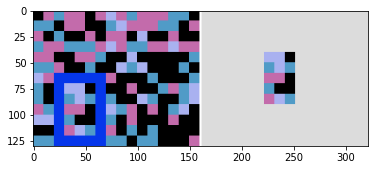

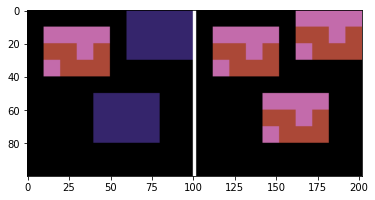

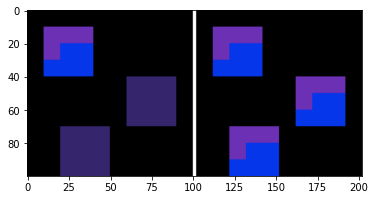

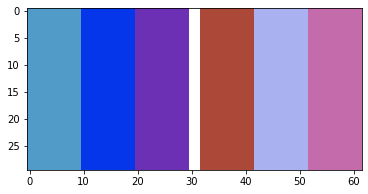

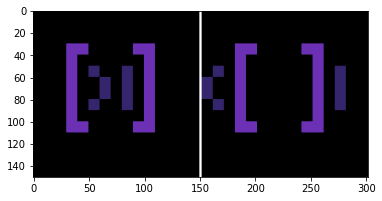

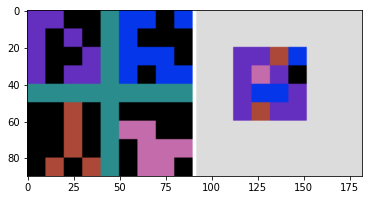

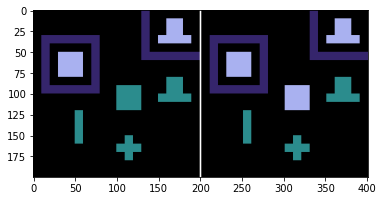

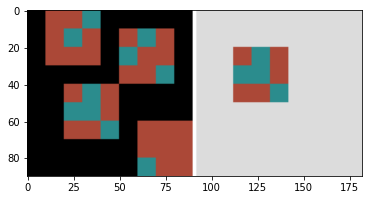

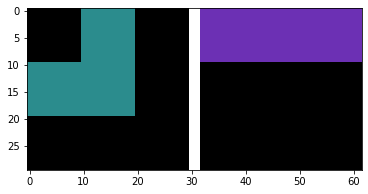

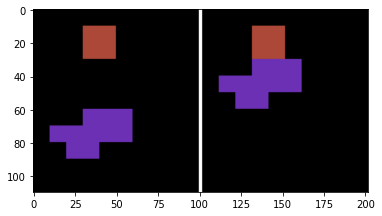

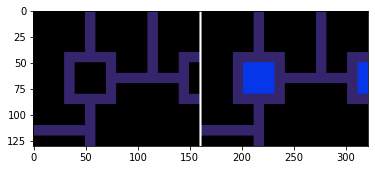

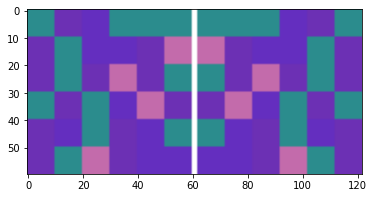

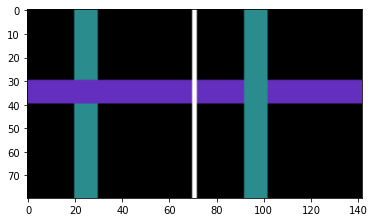

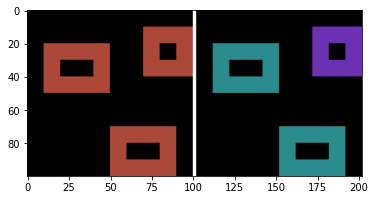

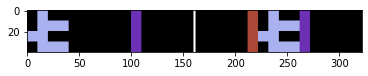

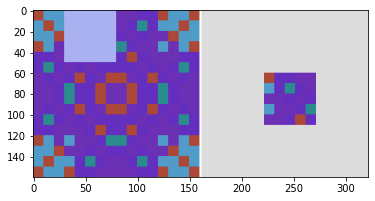

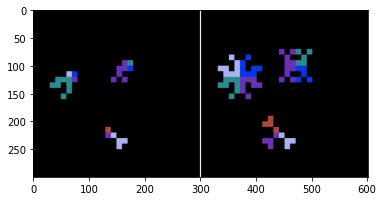

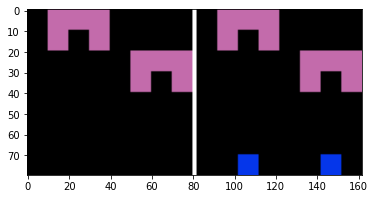

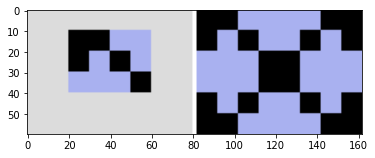

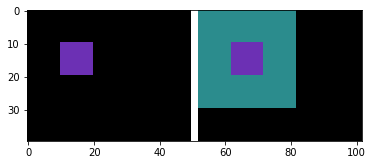

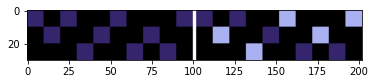

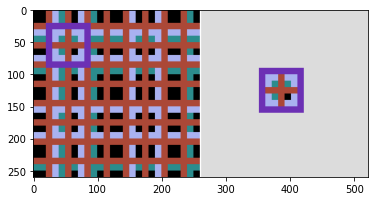

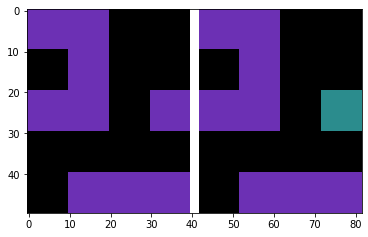

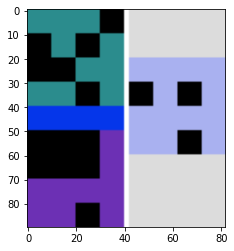

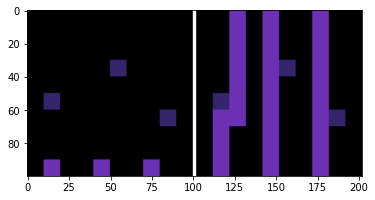

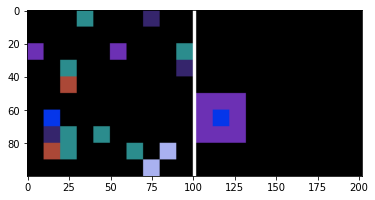

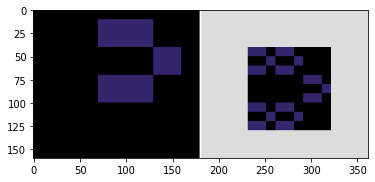

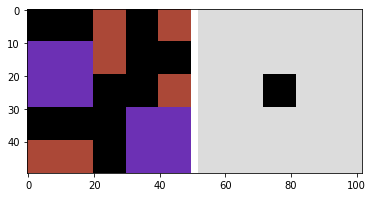

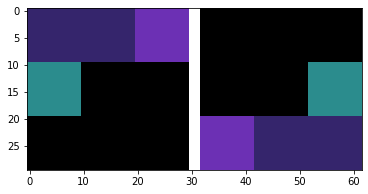

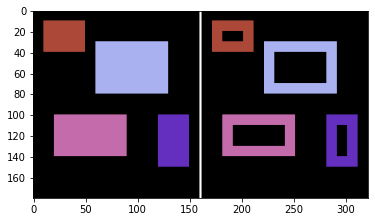

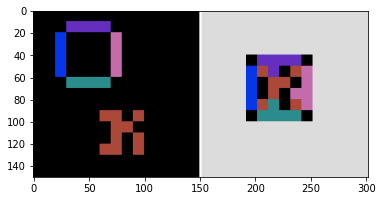

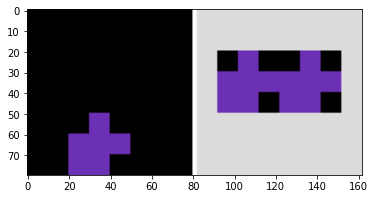

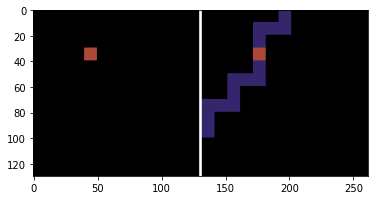

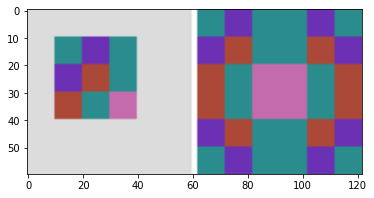

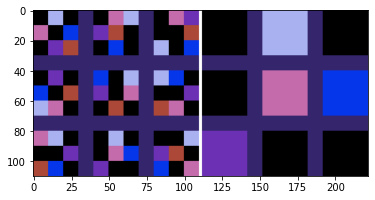

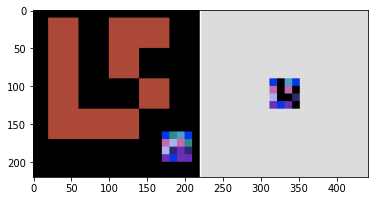

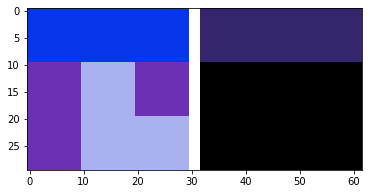

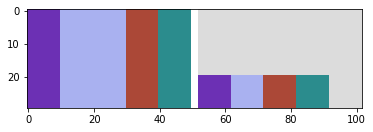

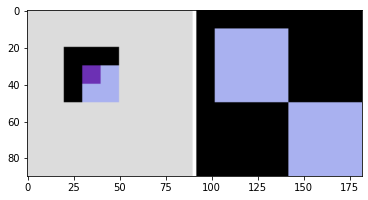

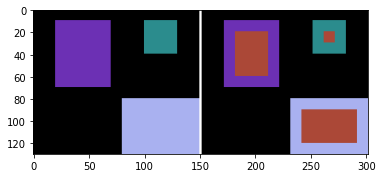

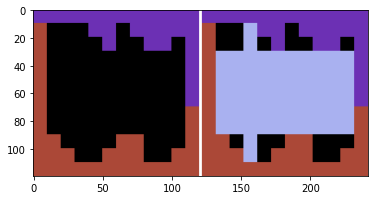

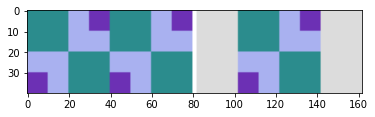

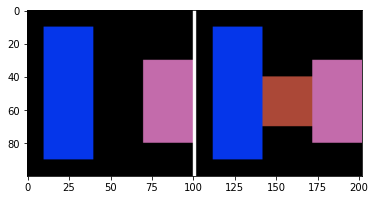

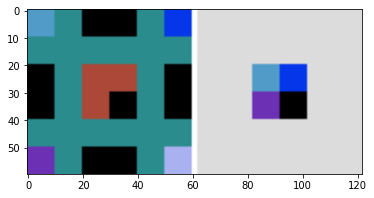

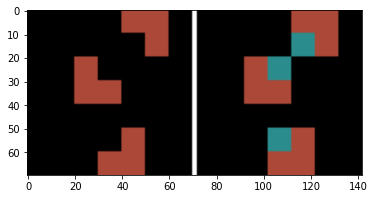

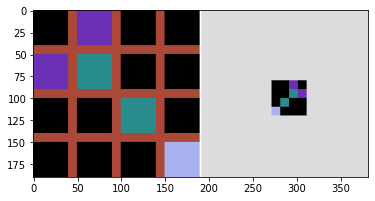

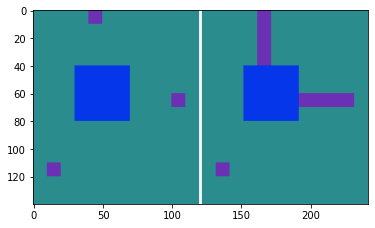

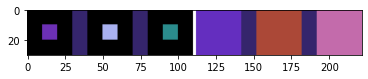

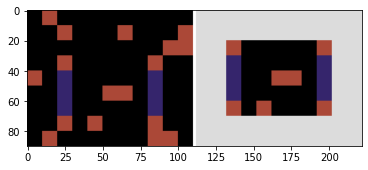

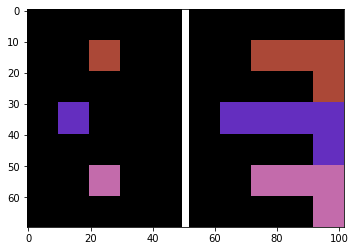

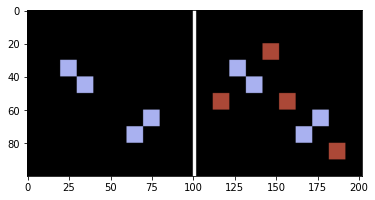

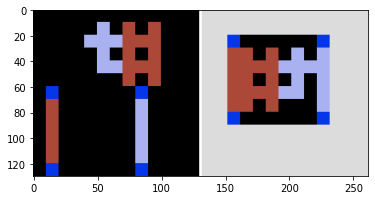

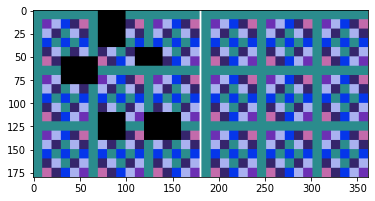

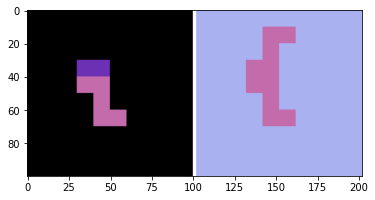

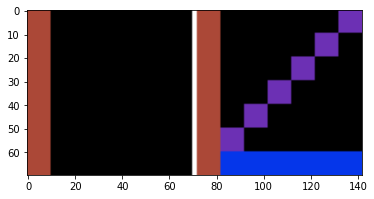

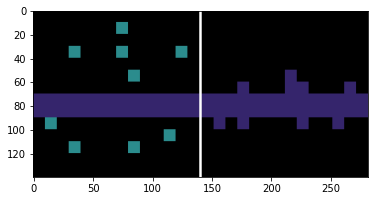

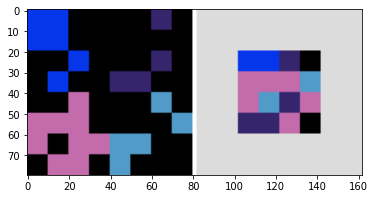

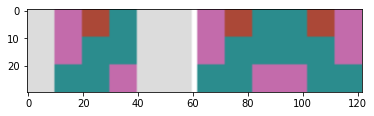

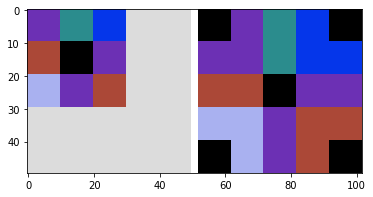

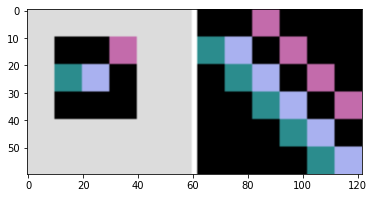

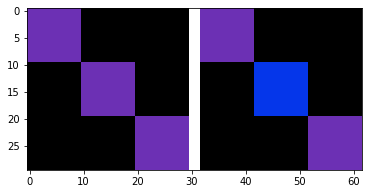

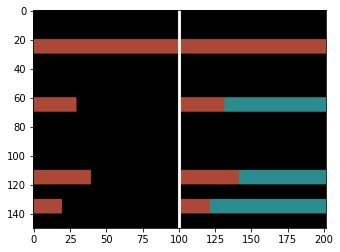

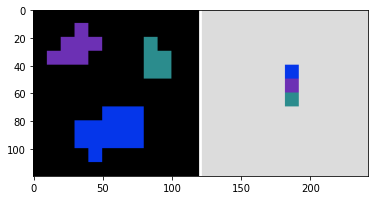

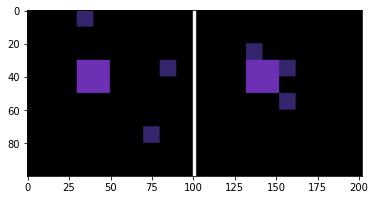

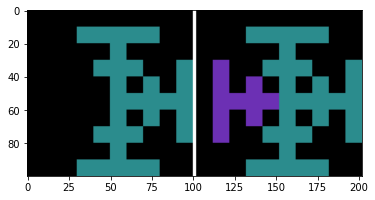

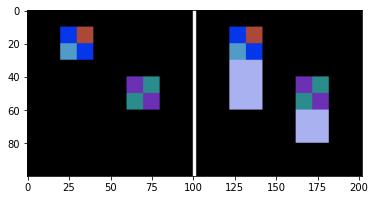

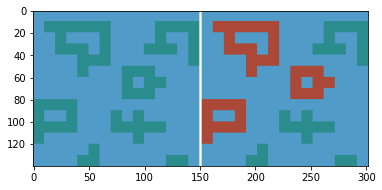

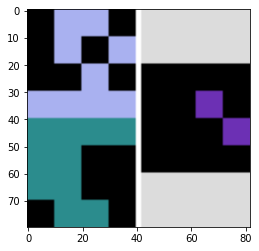

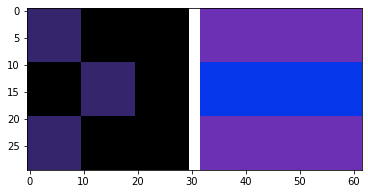

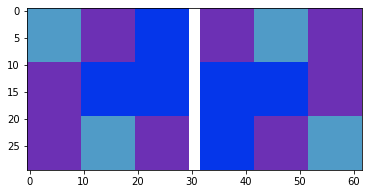

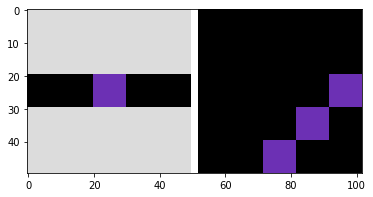

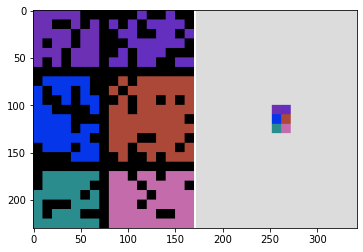

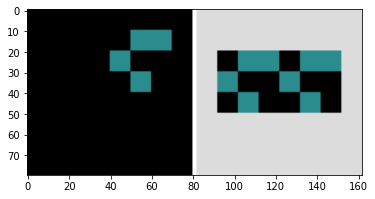

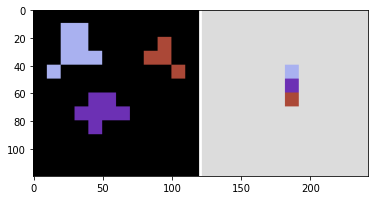

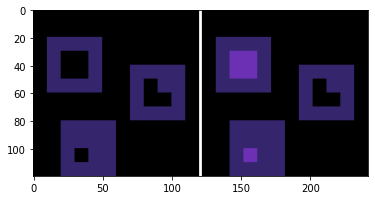

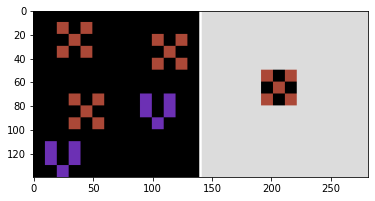

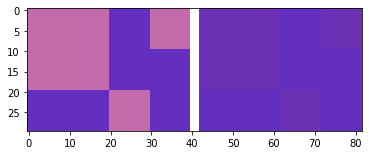

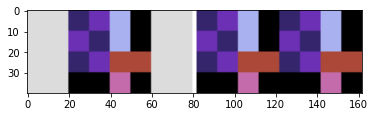

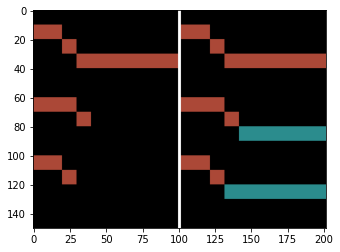

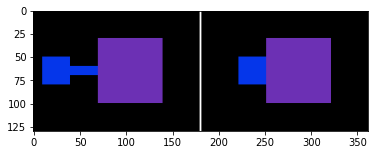

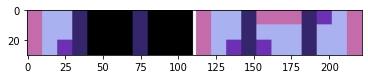

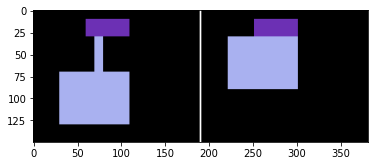

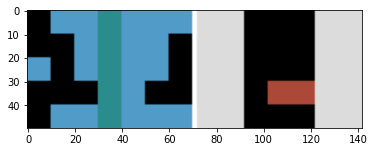

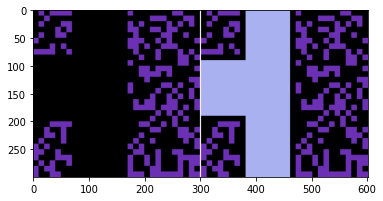

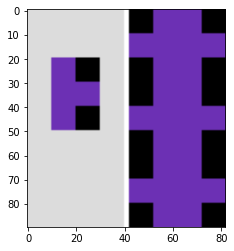

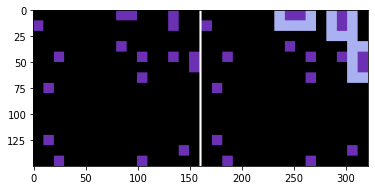

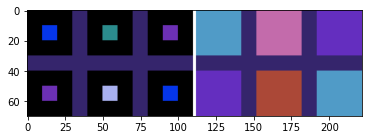

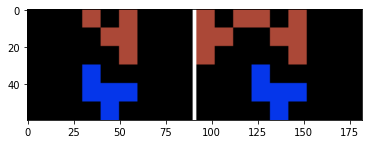

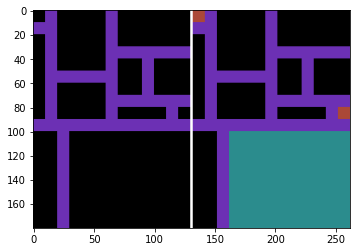

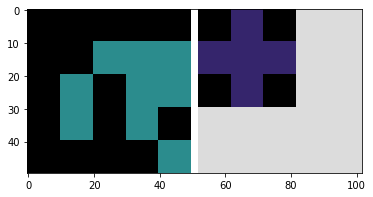

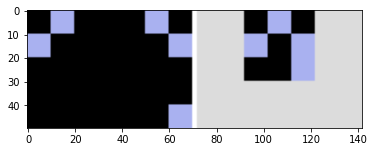

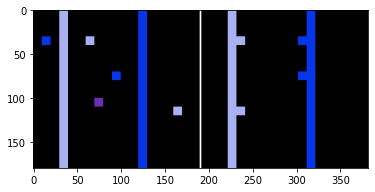

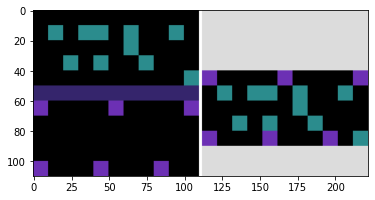

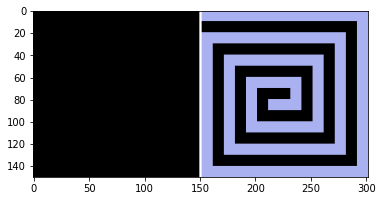

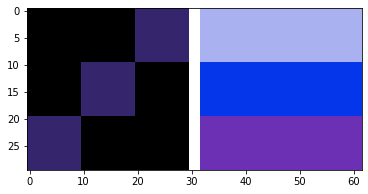

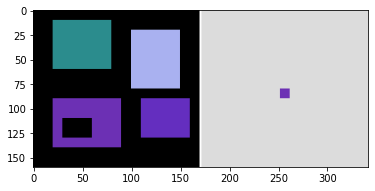

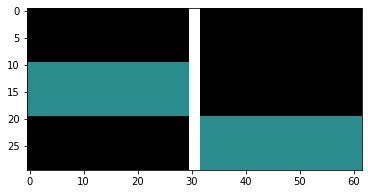

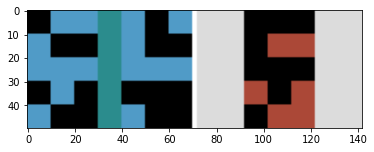

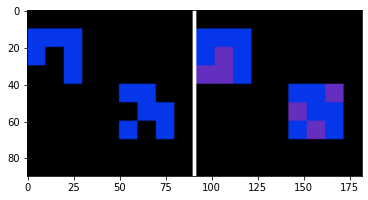

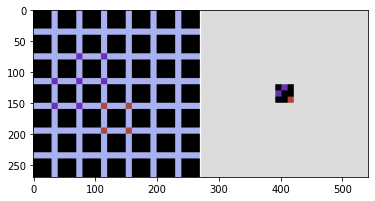

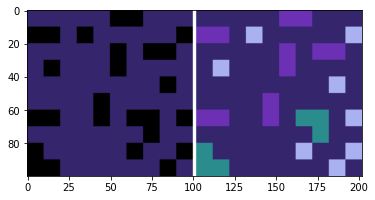

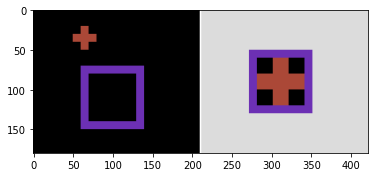

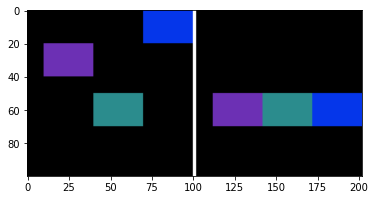

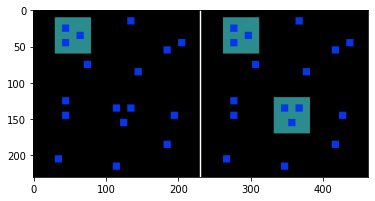

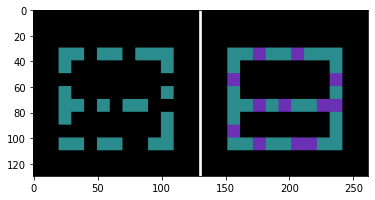

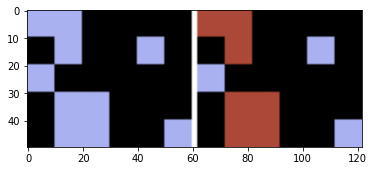

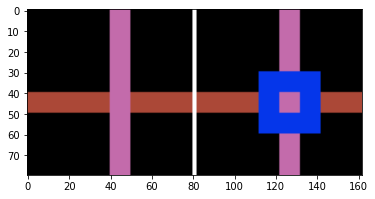

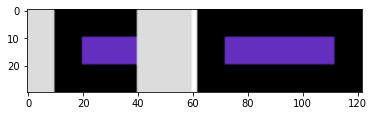

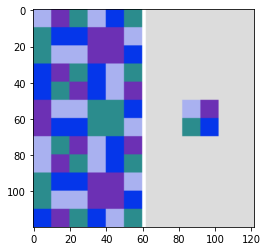

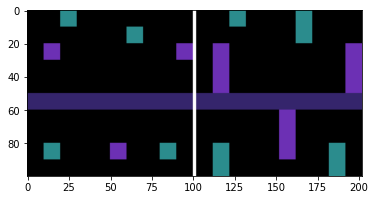

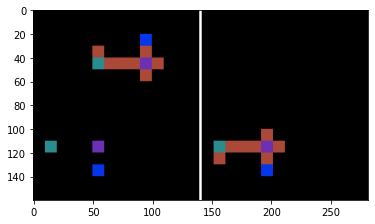

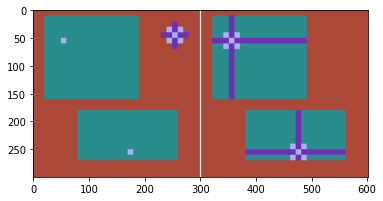

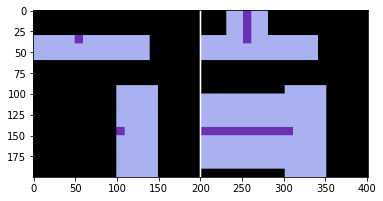

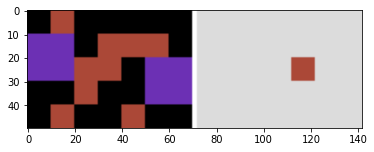

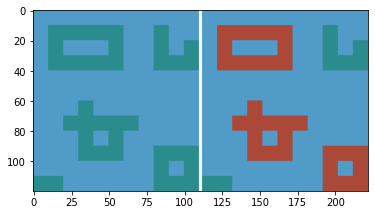

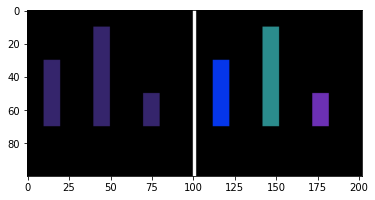

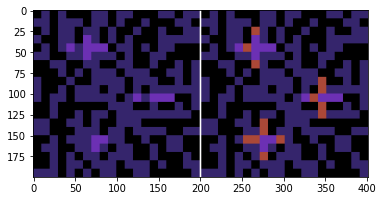

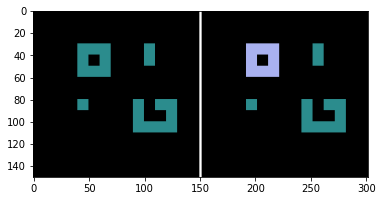

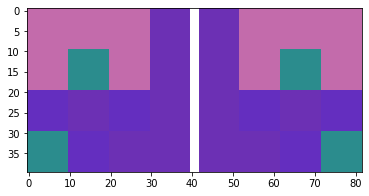

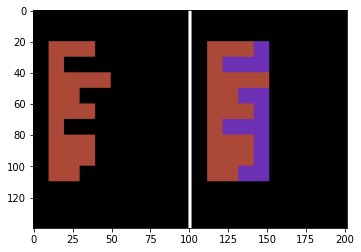

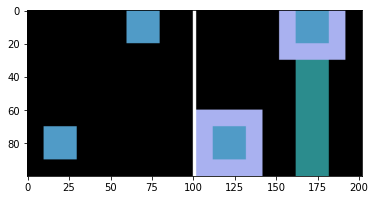

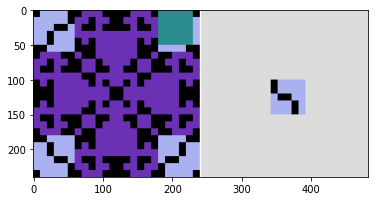

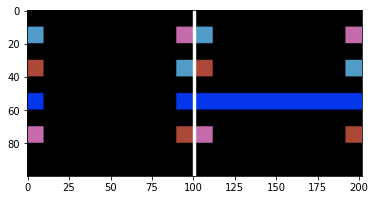

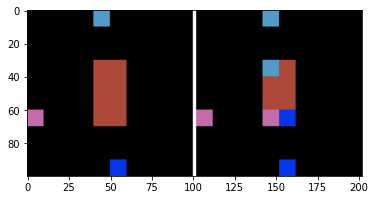

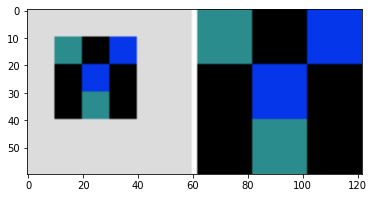

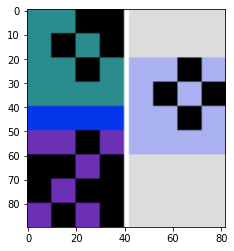

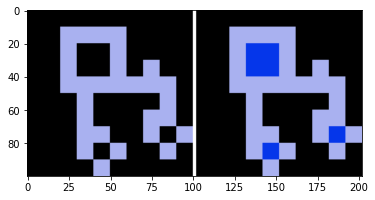

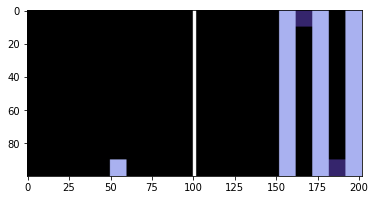

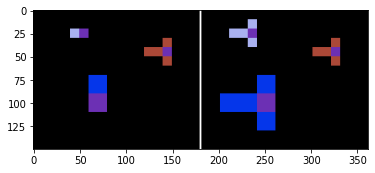

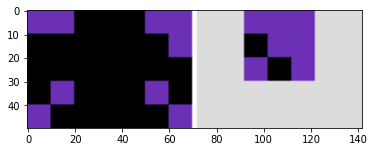

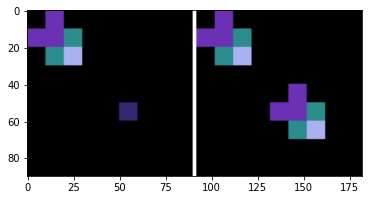

In [7]:
for idx,i in enumerate(list(os.listdir('vis'))):
    if idx%10 == 0:
        img = cv2.imread('vis/'+i)
        plt.imshow(img)
        plt.show()